# <span style= 'color : Blue;'>IMDB MOVIE ANALYSIS</span>

In [1]:
# Importing required modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Ingesting the data.
url ="https://raw.githubusercontent.com/MKGourab/IMDB-Movie-Analysis/main/IMDB_Movies.csv"
data = pd.read_csv(url)
data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


#### A. Cleaning the data:

    This is one of the most important step to perform before moving forward with the analysis. Use your knowledge learned till now to do this. (Dropping columns, removing null values, etc.)
    
    Your task: Clean the data

In [3]:
# Checking the shape of data
data.shape

(5043, 28)

In [4]:
# Checking for Null values
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
# Handling Null Values
data.dropna(inplace = True)

In [7]:
# Checking the shape of data after handling Null Values.
data.shape

(3756, 28)

In [8]:
# Chnaging dtype to int 
data['num_user_for_reviews'] = data['num_user_for_reviews'].astype(int)

#### B. Movies with highest profit:

    Create a new column called profit which contains the difference of the two columns: gross and budget. Sort the column using the profit column as reference. Plot profit (y-axis) vs budget (x- axis) and observe the outliers using the appropriate chart type.

    Your task: Find the movies with the highest profit?

In [9]:
# Create a new column called 'profit' which contains the difference between 'gross' and 'budget'
data['profit'] = data['gross'] - data['budget']

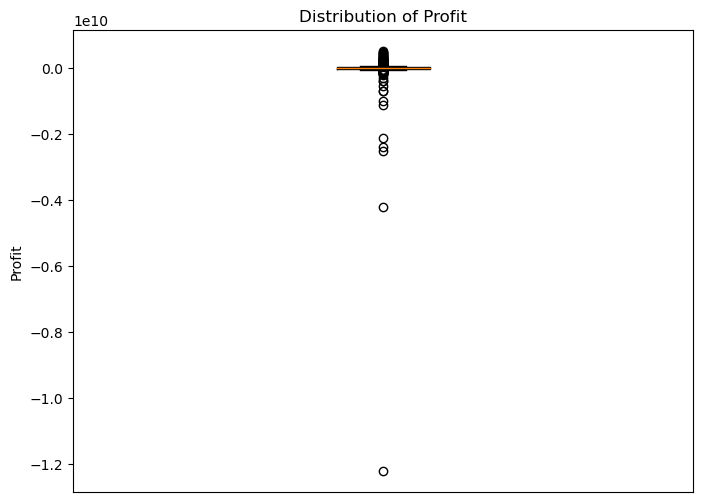

In [10]:
# Find the outliers 
q1 = data['profit'].quantile(0.25)
q3 = data['profit'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data['profit'] < lower_bound) | (data['profit'] > upper_bound)]
# Plot a boxplot to visualize the distribution of profit values
plt.figure(figsize=(8, 6))
plt.boxplot(data['profit'])
plt.ylabel('Profit')
plt.title('Distribution of Profit')
plt.xticks([])  
plt.show()

Insight: 

    From the above box plot we can see there are plenty of Outliers present in the Profit data.

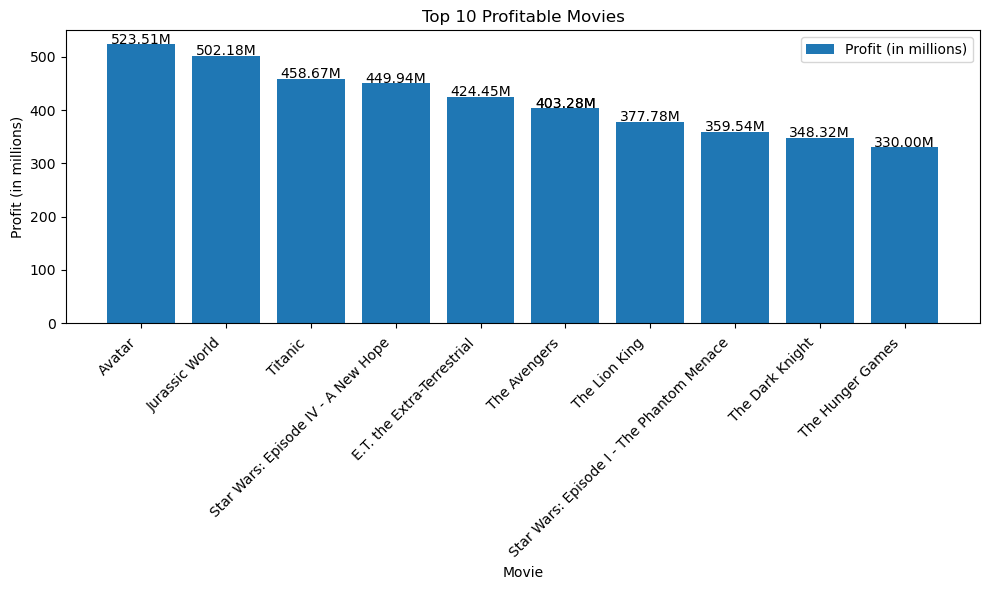

In [11]:
# Sort the DataFrame by the 'profit' column in descending order and get the top 10 movies
top_10_movies = data.nlargest(11, 'profit')

# Convert profit values to millions
top_10_movies['profit'] = top_10_movies['profit'] / 1000000

# Extract the movie name and profit columns for plotting
movies = []
profit = []

for index, row in top_10_movies.iterrows():
    movies.append(row['movie_title'])
    profit.append(row['profit'])

# Plot a bar graph comparing movie name and profit (in millions)
plt.figure(figsize=(10, 6))
plt.bar(movies, profit, label='Profit (in millions)')
plt.xlabel('Movie')
plt.ylabel('Profit (in millions)')
plt.title('Top 10 Profitable Movies')
plt.legend()
plt.xticks(rotation=45, ha='right')

# Add data labels to the bars
for i in range(len(movies)):
    plt.text(movies[i], profit[i] + 1, f'{profit[i]:.2f}M', ha='center')

plt.tight_layout()
plt.show()

##### Insight:
The top 10 movies with highest profit are:

    1. Avatar   
    2. Jurrasic World   
    3. Titanic  
    4. Star Wars: Episode IV - A New Hope   
    5. E.T The Extra-Terrestrial
    6. The Avengers    
    7. The Lion King    
    8. Star Wars: Episode I - The Phantom Menace    
    9. The Dark Night   
    10. The Hunger Games

#### C. Top 250: 

    Create a new column IMDb_Top_250 and store the top 250 movies with the highest IMDb Rating (corresponding to the column: imdb_score). 

    Also make sure that for all of these movies, the num_voted_users is greater than 25,000. 

    Also add a Rank column containing the values 1 to 250 indicating the ranks of the corresponding films.

    Extract all the movies in the IMDb_Top_250 column which are not in the English language and store them in a new column named 

    Top_Foreign_Lang_Film. You can use your own imagination also!

    Your task: Find IMDB Top 250

In [12]:
# Filter movies with num_voted_users > 25,000
filtered_movies = data[data['num_voted_users'] > 25000]

# Sort the movies by imdb_score in descending order and select top 250
top_250_movies = filtered_movies.nlargest(250, 'imdb_score')

# Add Rank column
top_250_movies['Rank'] = range(1, 251)

# Extract movies not in English from IMDb_Top_250 column
top_foreign_lang_movies = top_250_movies[top_250_movies['language'] != 'English']

In [13]:
# Display the IMDb Top 250 movies
imdb_top_250 = top_250_movies[['Rank', 'movie_title', 'imdb_score']]
print(f"Top 250 Movies:\n{imdb_top_250.to_string(index=False)}")

Top 250 Movies:
 Rank                                             movie_title  imdb_score
    1                               The Shawshank Redemption          9.3
    2                                          The Godfather          9.2
    3                                        The Dark Knight          9.0
    4                                 The Godfather: Part II          9.0
    5          The Lord of the Rings: The Return of the King          8.9
    6                                       Schindler's List          8.9
    7                                           Pulp Fiction          8.9
    8                         The Good, the Bad and the Ugly          8.9
    9                                              Inception          8.8
   10      The Lord of the Rings: The Fellowship of the Ring          8.8
   11                                             Fight Club          8.8
   12                                           Forrest Gump          8.8
   13         Star War

In [14]:
foreign_lang_movies_list = top_foreign_lang_movies['movie_title'].tolist()
print("-" * 30)
print("Foreign Language Movies:")
print("-" * 30)
for movie in foreign_lang_movies_list:
    print(movie)

------------------------------
Foreign Language Movies:
------------------------------
The Good, the Bad and the Ugly 
City of God 
Seven Samurai 
Spirited Away 
The Lives of Others 
Children of Heaven 
Amélie 
Princess Mononoke 
Das Boot 
Oldboy 
A Separation 
Metropolis 
Downfall 
The Hunt 
Howl's Moving Castle 
Pan's Labyrinth 
Incendies 
The Secret in Their Eyes 
The Sea Inside 
Tae Guk Gi: The Brotherhood of War 
Akira 
Elite Squad 
Amores Perros 
The Celebration 
My Name Is Khan 
Persepolis 
Central Station 
Waltz with Bashir 
A Fistful of Dollars 
Hero 
Hero 
Crouching Tiger, Hidden Dragon 
Letters from Iwo Jima 
Amour 


#### D.Best Directors: 

    Group the column using the director_name column.

    Find out the top 10 directors for whom the mean of imdb_score is the highest and store them in a new column top 10 director. In case of a tie in IMDb score between two directors, sort them alphabetically.

    Your task: Find the best directors

In [15]:
# Group the column using the director_name column
director_scores = data.groupby('director_name')['imdb_score'].mean()

# Sort the directors based on the mean IMDb score and alphabetical order
top_directors = director_scores.sort_values(ascending=False)

# Get the top 10 directors
top10_director = top_directors.head(10)

print(top10_director)

director_name
Akira Kurosawa       8.700000
Charles Chaplin      8.600000
Tony Kaye            8.600000
Majid Majidi         8.500000
Ron Fricke           8.500000
Damien Chazelle      8.500000
Alfred Hitchcock     8.500000
Sergio Leone         8.433333
Christopher Nolan    8.425000
Asghar Farhadi       8.400000
Name: imdb_score, dtype: float64


#### E. Popular Genres: 

    Perform this step using the knowledge gained while performing previous steps.

    Your task: Find popular genres

Comedy|Drama|Romance                     147
Drama                                    141
Comedy|Drama                             138
Comedy                                   138
Comedy|Romance                           131
                                        ... 
Action|Drama|Fantasy|Horror|Thriller       1
Action|Thriller|Western                    1
Action|Adventure|Drama|Family              1
Animation|Comedy|Family|Music|Romance      1
Comedy|Crime|Horror                        1
Name: genres, Length: 745, dtype: int64


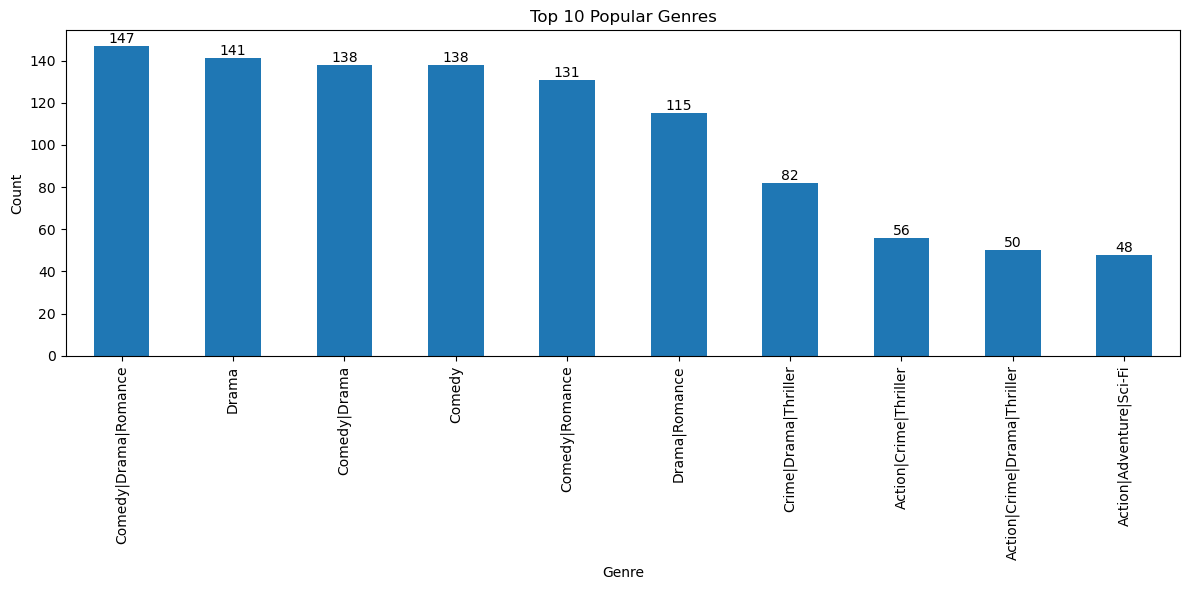

In [16]:
# Count the occurrences of each genre
genre_counts = data['genres'].value_counts()
print(genre_counts)

# Get the top 10 popular genres
top10_genres = genre_counts.head(10)

# Plot the top 10 popular genres
plt.figure(figsize=(12, 6))
top10_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Popular Genres')
plt.xticks(rotation=90)

# Add data labels to the bars
for i, count in enumerate(top10_genres):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Insight:

    Commedy|Drama|Romance is the most popular Genre.

#### F. Charts: 

    Create three new columns namely, Meryl_Streep, Leo_Caprio, and Brad_Pitt which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the actor_1_name column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.

    Append the rows of all these columns and store them in a new column named Combined.

    Group the combined column using the actor_1_name column.

    Find the mean of the num_critic_for_reviews and num_users_for_review and identify the actors which have the highest mean.

    Observe the change in number of voted users over decades using a bar chart. Create a column called decade which represents the decade to which every movie belongs to. For example, the title_year year 1923, 1925 should be stored as 1920s. Sort the column based on the column decade, group it by decade and find the sum of users voted in each decade. Store this in a new data frame called df_by_decade.


    Your task: Find the critic-favorite and audience-favorite actors

In [17]:
# Creating 3 New Columns namely Meryl_Streep, Leo_Caprio, and Brad_Pitt
data['Meryl_Streep'] = data['actor_1_name'] == 'Meryl Streep'
data['Leo_Caprio'] = data['actor_1_name'] == 'Leonardo DiCaprio'
data['Brad_Pitt'] = data['actor_1_name'] == 'Brad Pitt'


In [18]:
# Creating new column named Combined which stores 0 or 1. 
# 0 for Neither of the three actors are in lead role and 1 for either of the 3 actors are in lead roles
data['Combined'] = data['Meryl_Streep'].astype(int) + data['Leo_Caprio'].astype(int) + data['Brad_Pitt'].astype(int)


In [19]:
# Print the movie names where the lead actors are either Meryl Streep or Leonardo Dicaprio or Bradd Pitt.

meryl_streep_movies = data[data['actor_1_name'] == 'Meryl Streep']['movie_title'].tolist()
print("-" * 60)
print("Meryl Streep Movies:")
print("-" * 60)
for movie in meryl_streep_movies:
    print(movie)
print("-" * 60)

leo_dicaprio_movies = data[data['actor_1_name'] == 'Leonardo DiCaprio']['movie_title'].tolist()
print("Leonardo DiCaprio Movies:")
print("-" * 60)
for movie in leo_dicaprio_movies:
    print(movie)
print("-" * 60)

brad_pitt_movies = data[data['actor_1_name'] == 'Brad Pitt']['movie_title'].tolist()
print("Brad Pitt Movies:")
print("-" * 60)
for movie in brad_pitt_movies:
    print(movie)

------------------------------------------------------------
Meryl Streep Movies:
------------------------------------------------------------
It's Complicated 
The River Wild 
Julie & Julia 
The Devil Wears Prada 
Lions for Lambs 
Out of Africa 
Hope Springs 
One True Thing 
The Hours 
The Iron Lady 
A Prairie Home Companion 
------------------------------------------------------------
Leonardo DiCaprio Movies:
------------------------------------------------------------
Titanic 
The Great Gatsby 
Inception 
The Revenant 
The Aviator 
Django Unchained 
Blood Diamond 
The Wolf of Wall Street 
Gangs of New York 
The Departed 
Shutter Island 
Body of Lies 
Catch Me If You Can 
The Beach 
Revolutionary Road 
The Man in the Iron Mask 
J. Edgar 
The Quick and the Dead 
Marvin's Room 
Romeo + Juliet 
The Great Gatsby 
------------------------------------------------------------
Brad Pitt Movies:
------------------------------------------------------------
The Curious Case of Benjamin Button 

In [20]:
# Calculate the mean of num_critic_for_reviews and num_user_for_reviews
mean_critic_reviews = data['num_critic_for_reviews'].mean()
mean_user_reviews = data['num_user_for_reviews'].mean()
print("-" * 50)
print("Mean of num_critic_for_reviews:", mean_critic_reviews)
print("-" * 50)
print("Mean of num_user_for_reviews:", mean_user_reviews)
print("-" * 50)
# Find the actors with the highest mean values
highest_mean_actors = []
actors = ['actor_1_name', 'actor_2_name', 'actor_3_name']
for actor in actors:
    mean_actor_reviews = data.groupby(actor)[['num_critic_for_reviews', 'num_user_for_reviews']].mean().mean(axis=1)
    highest_mean_actor = mean_actor_reviews.idxmax()
    highest_mean_actors.append(highest_mean_actor)

print("Actors with the highest mean reviews:")
print("-" * 40)
for i, actor in enumerate(highest_mean_actors):
    print(f"Actor {i+1}: {actor}")

print("-" * 40)


--------------------------------------------------
Mean of num_critic_for_reviews: 167.3783280085197
--------------------------------------------------
Mean of num_user_for_reviews: 336.84318423855166
--------------------------------------------------
Actors with the highest mean reviews:
----------------------------------------
Actor 1: Heather Donahue
Actor 2: Marcus Chong
Actor 3: Morgan Freeman
----------------------------------------


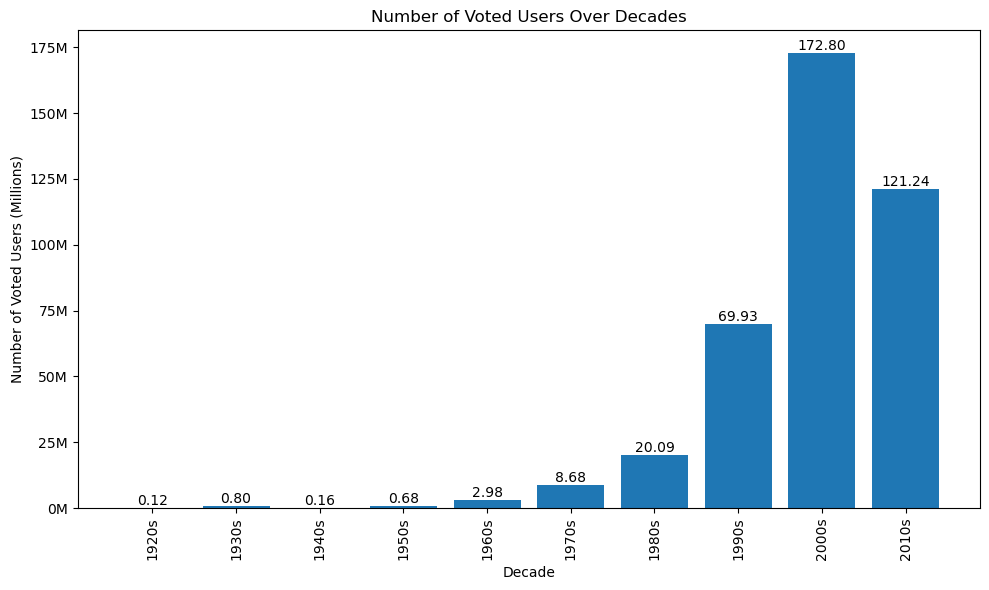

In [21]:
# Create a new column 'decade' to represent the decade to which each movie belongs
data['decade'] = (data['title_year'] // 10) * 10
data['decade'] = data['decade'].astype(int).astype(str) + "s"

# Group the data by decade and calculate the sum of users voted in each decade
df_by_decade = data.groupby('decade')['num_voted_users'].sum().reset_index()

# Sort the dataframe by the 'decade' column
df_by_decade = df_by_decade.sort_values('decade')

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_by_decade['decade'], df_by_decade['num_voted_users'] / 1_000_000)  # Divide by 1 million
plt.xlabel('Decade')
plt.ylabel('Number of Voted Users (Millions)')
plt.title('Number of Voted Users Over Decades')

# Add data labels to the bar chart
for i, num_votes in enumerate(df_by_decade['num_voted_users']):
    plt.text(i, num_votes / 1_000_000, f"{num_votes / 1_000_000:.2f}", ha='center', va='bottom')

plt.xticks(rotation=90)

# Format y-axis tick labels as millions
formatter = mticker.FuncFormatter(lambda x, _: f'{x:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

Insight:

    Most number of users (172.8 Million) voted in the 2000s.

In [22]:
# Exporting the cleaned data to a csv file named Cleaned_IMDB_Dataset.
data.to_csv("Cleaned_IMDB_Dataset.csv")